In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
tempo  = ['state_night', 'state_dawn']
mdv1 = ['vm1', 'vd1']
mdv2 = ['vm2', 'vd2']
lag = ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20']

In [5]:
errors = []

Error for the time series sample:
O erro quadrático médio foi: 0.008566
O erro quadrático total foi: 2.194069
O maior erro por previsão foi: 0.445061
O erro relativo foi: 21.951341%
O número de verdadeiros negativos foi: 275
O número de verdadeiros positivos foi: 120
O número de falsos negativos foi: 33
O número de falsos positivos foi: 134
O POD foi: 0.784314
O FAR foi: 0.527559
A ACC foi: 0.702847
O kappa foi: 0.079644
precission: 0.472441
recal: 0.784314
f1: 0.589681


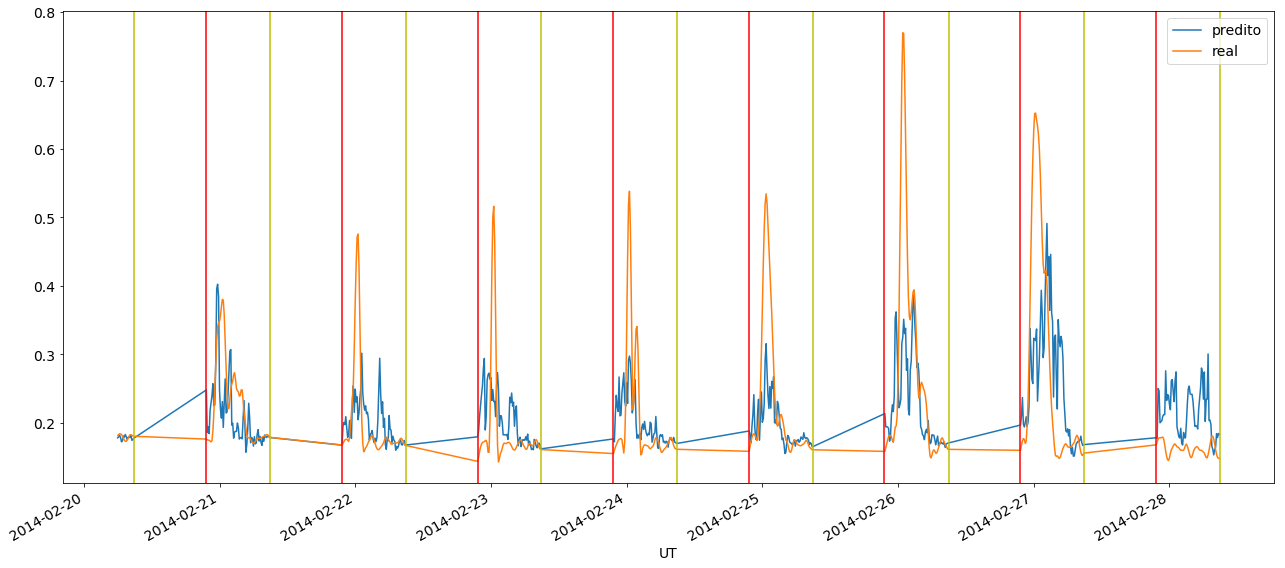

In [6]:
dict_error = generate_and_avaliate_model(df, original, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.009815
O erro quadrático total foi: 2.348642
O maior erro por previsão foi: 0.477565
O erro relativo foi: 28.850089%
O número de verdadeiros negativos foi: 231
O número de verdadeiros positivos foi: 120
O número de falsos negativos foi: 33
O número de falsos positivos foi: 178
O POD foi: 0.784314
O FAR foi: 0.597315
A ACC foi: 0.624555
O kappa foi: 0.091764
precission: 0.402685
recal: 0.784314
f1: 0.532151


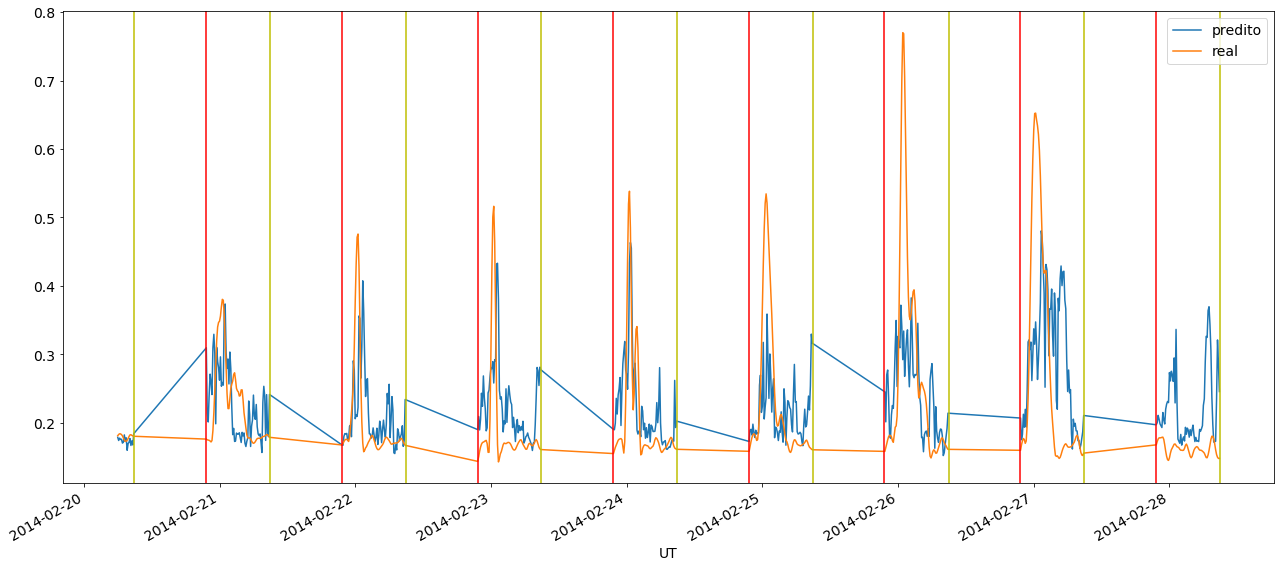

In [7]:
dict_error = generate_and_avaliate_model(df, ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.008916
O erro quadrático total foi: 2.238483
O maior erro por previsão foi: 0.457354
O erro relativo foi: 21.879647%
O número de verdadeiros negativos foi: 296
O número de verdadeiros positivos foi: 119
O número de falsos negativos foi: 34
O número de falsos positivos foi: 113
O POD foi: 0.777778
O FAR foi: 0.487069
A ACC foi: 0.738434
O kappa foi: 0.074439
precission: 0.512931
recal: 0.777778
f1: 0.618182


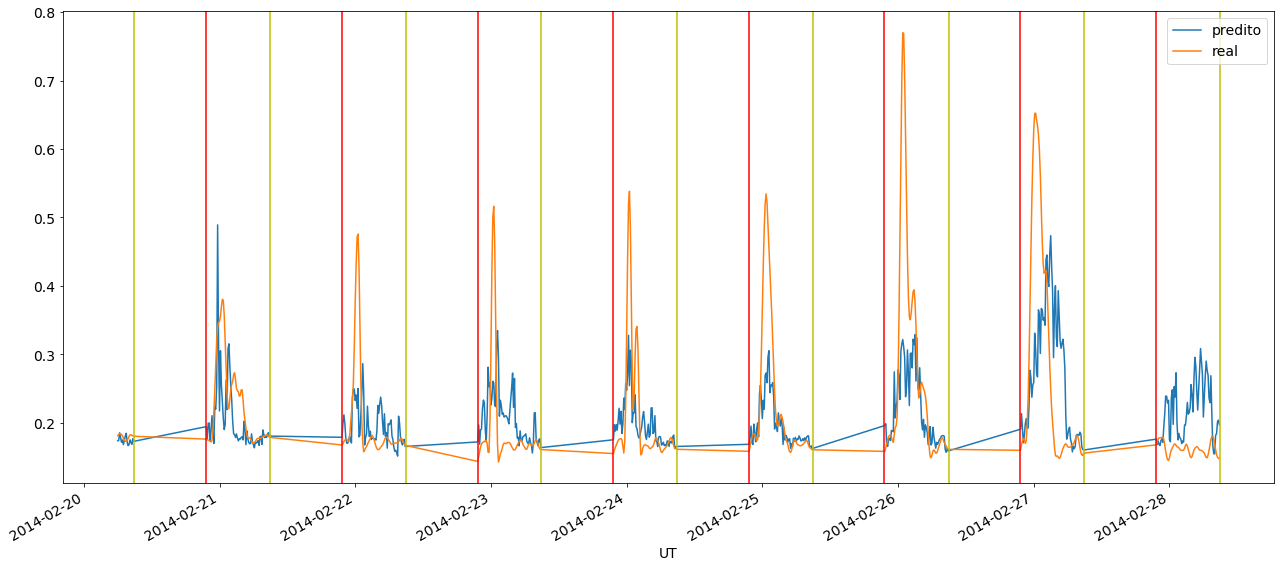

In [8]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.007320
O erro quadrático total foi: 2.028273
O maior erro por previsão foi: 0.425954
O erro relativo foi: 20.617662%
O número de verdadeiros negativos foi: 290
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 119
O POD foi: 0.803922
O FAR foi: 0.491736
A ACC foi: 0.734875
O kappa foi: 0.073888
precission: 0.508264
recal: 0.803922
f1: 0.622785


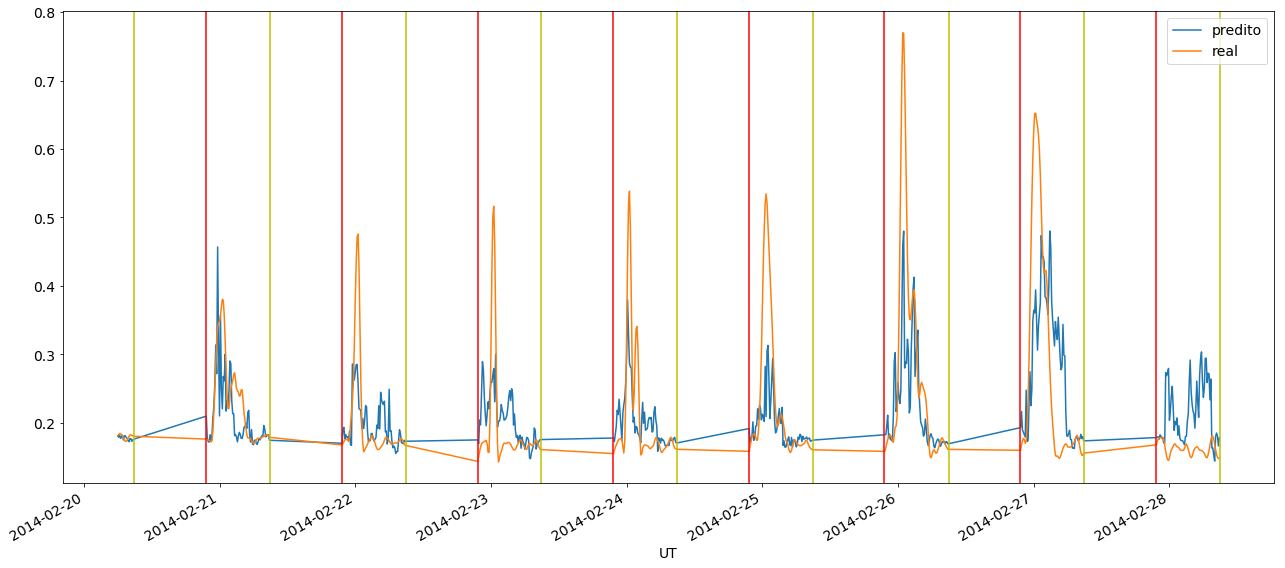

In [9]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.008250
O erro quadrático total foi: 2.153303
O maior erro por previsão foi: 0.416158
O erro relativo foi: 20.558853%
O número de verdadeiros negativos foi: 293
O número de verdadeiros positivos foi: 114
O número de falsos negativos foi: 39
O número de falsos positivos foi: 116
O POD foi: 0.745098
O FAR foi: 0.504348
A ACC foi: 0.724199
O kappa foi: 0.078048
precission: 0.495652
recal: 0.745098
f1: 0.595300


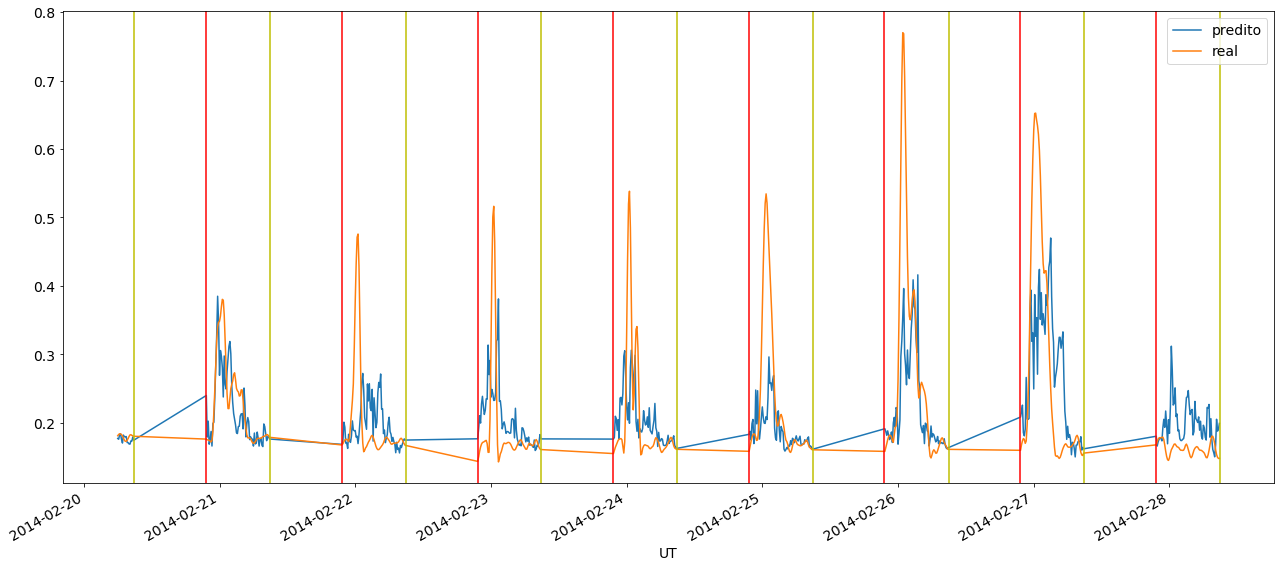

In [10]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.008757
O erro quadrático total foi: 2.218381
O maior erro por previsão foi: 0.471836
O erro relativo foi: 20.566928%
O número de verdadeiros negativos foi: 310
O número de verdadeiros positivos foi: 116
O número de falsos negativos foi: 37
O número de falsos positivos foi: 99
O POD foi: 0.758170
O FAR foi: 0.460465
A ACC foi: 0.758007
O kappa foi: 0.072675
precission: 0.539535
recal: 0.758170
f1: 0.630435


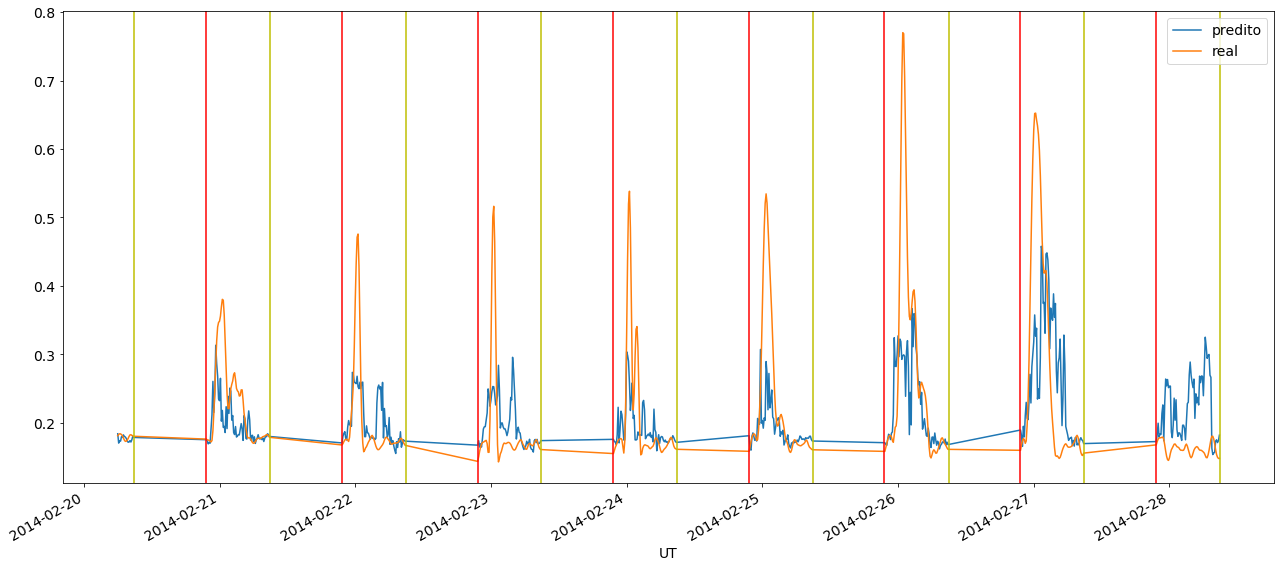

In [11]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.009989
O erro quadrático total foi: 2.369367
O maior erro por previsão foi: 0.493140
O erro relativo foi: 27.953592%
O número de verdadeiros negativos foi: 223
O número de verdadeiros positivos foi: 130
O número de falsos negativos foi: 23
O número de falsos positivos foi: 186
O POD foi: 0.849673
O FAR foi: 0.588608
A ACC foi: 0.628114
O kappa foi: 0.092796
precission: 0.411392
recal: 0.849673
f1: 0.554371


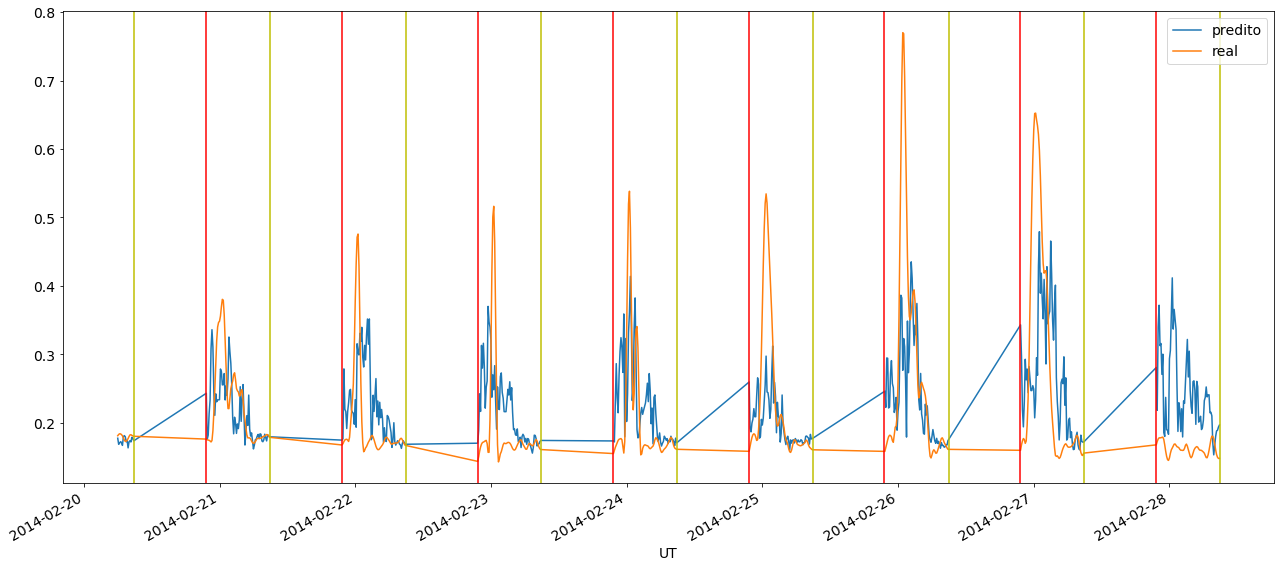

In [12]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.009120
O erro quadrático total foi: 2.263883
O maior erro por previsão foi: 0.474853
O erro relativo foi: 22.941802%
O número de verdadeiros negativos foi: 286
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 123
O POD foi: 0.797386
O FAR foi: 0.502041
A ACC foi: 0.725979
O kappa foi: 0.075582
precission: 0.497959
recal: 0.797386
f1: 0.613065


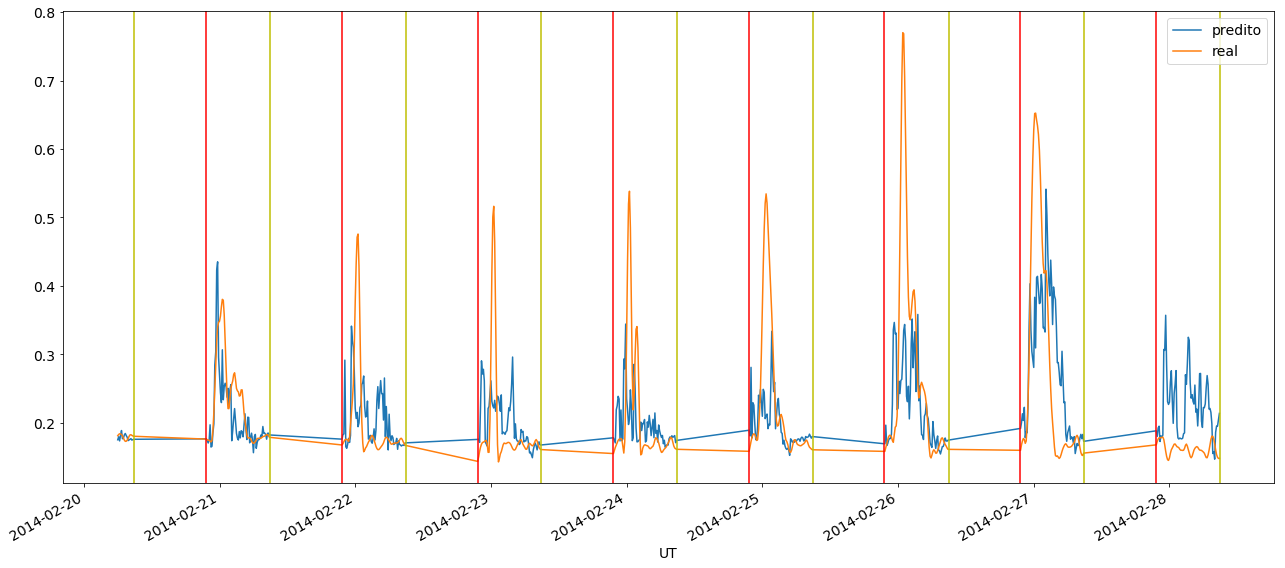

In [13]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.012294
O erro quadrático total foi: 2.628561
O maior erro por previsão foi: 0.537028
O erro relativo foi: 25.901663%
O número de verdadeiros negativos foi: 280
O número de verdadeiros positivos foi: 91
O número de falsos negativos foi: 62
O número de falsos positivos foi: 129
O POD foi: 0.594771
O FAR foi: 0.586364
A ACC foi: 0.660142
O kappa foi: 0.092131
precission: 0.413636
recal: 0.594771
f1: 0.487936


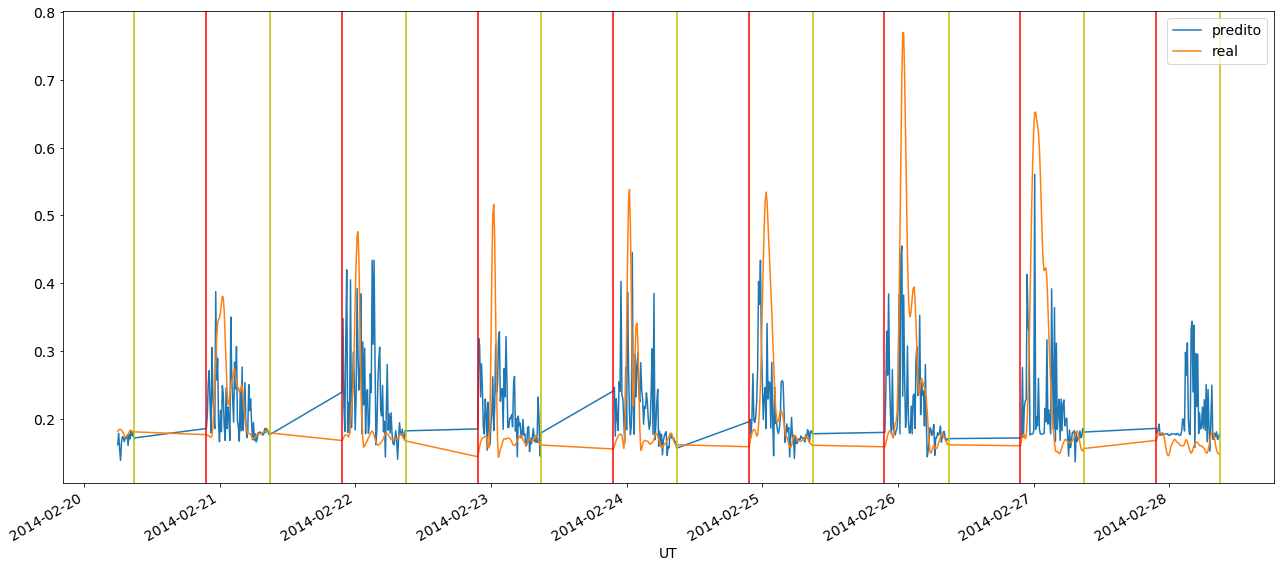

In [14]:
dict_error = generate_and_avaliate_model(df, ['vtec',], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.009936
O erro quadrático total foi: 2.363053
O maior erro por previsão foi: 0.477640
O erro relativo foi: 26.983845%
O número de verdadeiros negativos foi: 244
O número de verdadeiros positivos foi: 135
O número de falsos negativos foi: 18
O número de falsos positivos foi: 165
O POD foi: 0.882353
O FAR foi: 0.550000
A ACC foi: 0.674377
O kappa foi: 0.084431
precission: 0.450000
recal: 0.882353
f1: 0.596026


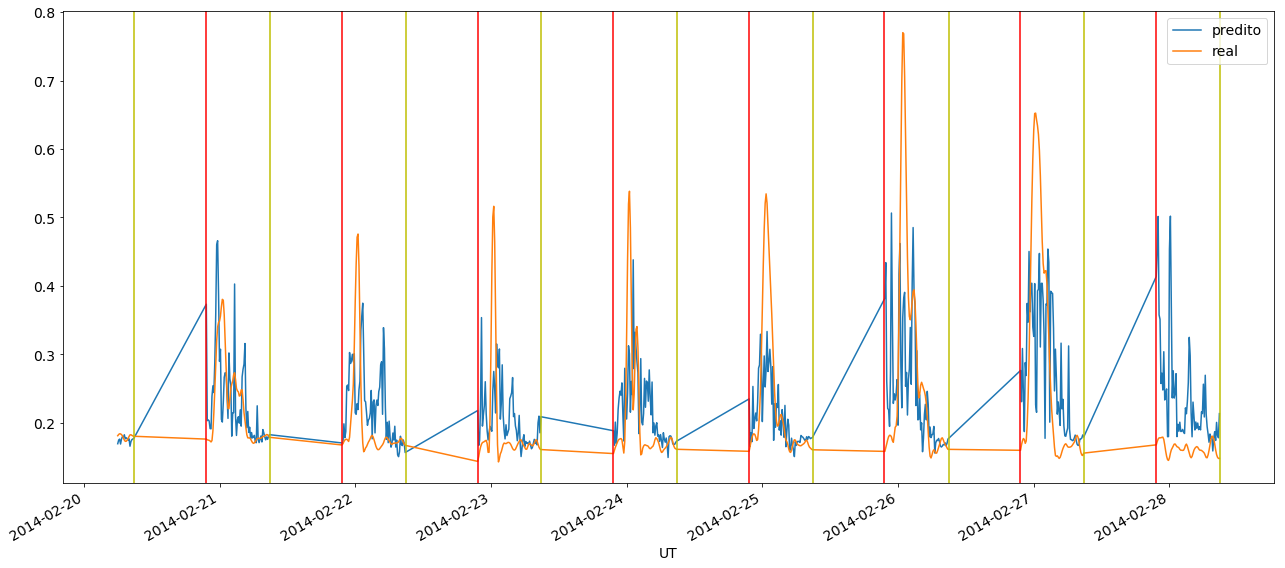

In [15]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.010560
O erro quadrático total foi: 2.436160
O maior erro por previsão foi: 0.539527
O erro relativo foi: 21.054888%
O número de verdadeiros negativos foi: 322
O número de verdadeiros positivos foi: 96
O número de falsos negativos foi: 57
O número de falsos positivos foi: 87
O POD foi: 0.627451
O FAR foi: 0.475410
A ACC foi: 0.743772
O kappa foi: 0.084554
precission: 0.524590
recal: 0.627451
f1: 0.571429


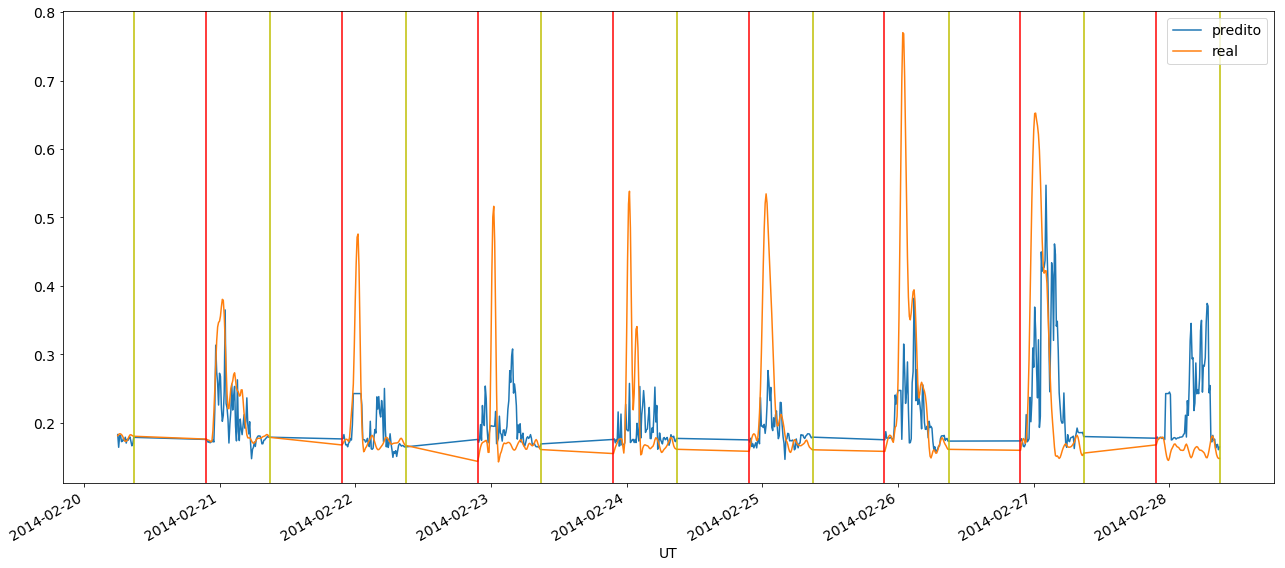

In [16]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'gvtec1', 'gvtec2'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.010451
O erro quadrático total foi: 2.423480
O maior erro por previsão foi: 0.564719
O erro relativo foi: 28.551284%
O número de verdadeiros negativos foi: 225
O número de verdadeiros positivos foi: 128
O número de falsos negativos foi: 25
O número de falsos positivos foi: 184
O POD foi: 0.836601
O FAR foi: 0.589744
A ACC foi: 0.628114
O kappa foi: 0.092378
precission: 0.410256
recal: 0.836601
f1: 0.550538


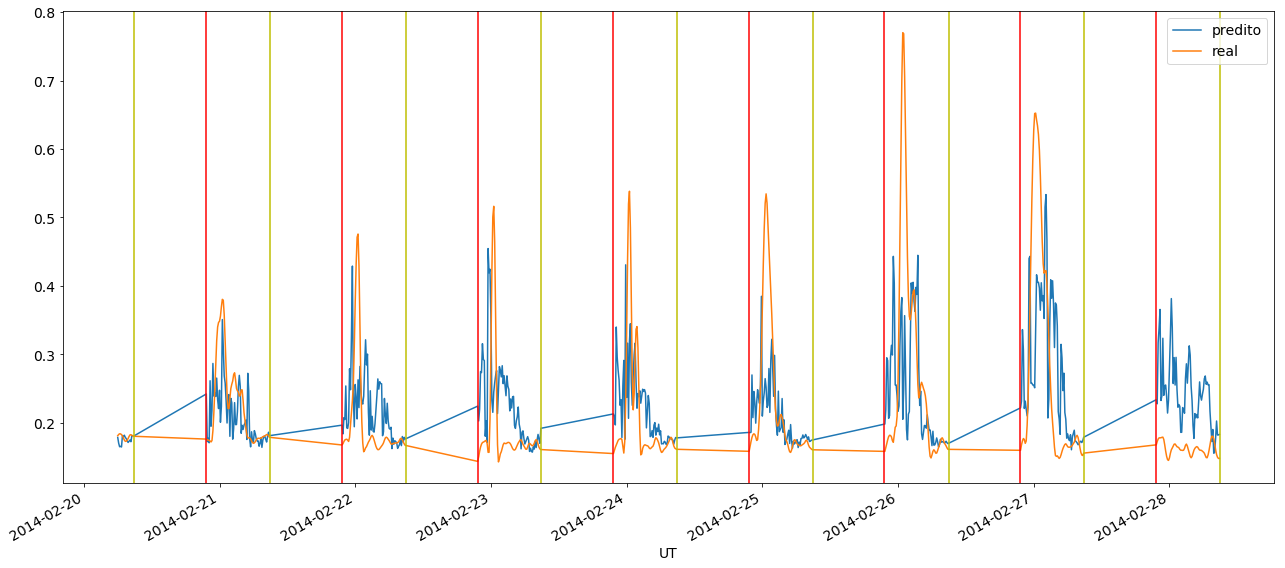

In [17]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.007393
O erro quadrático total foi: 2.038336
O maior erro por previsão foi: 0.392740
O erro relativo foi: 21.174781%
O número de verdadeiros negativos foi: 286
O número de verdadeiros positivos foi: 133
O número de falsos negativos foi: 20
O número de falsos positivos foi: 123
O POD foi: 0.869281
O FAR foi: 0.480469
A ACC foi: 0.745552
O kappa foi: 0.069905
precission: 0.519531
recal: 0.869281
f1: 0.650367


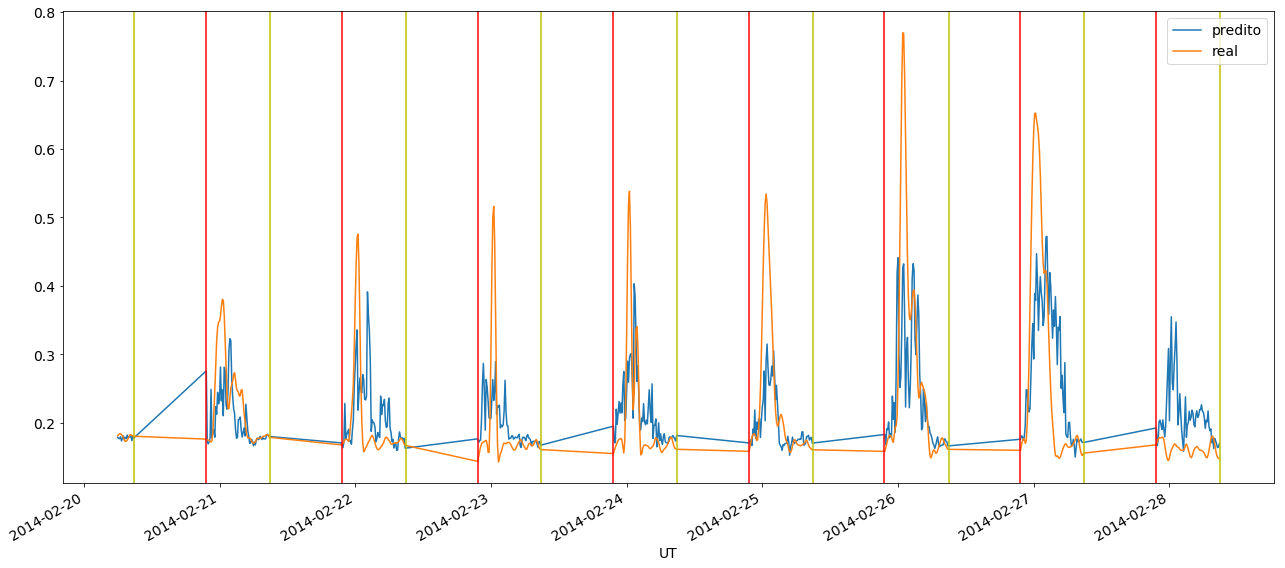

In [18]:
dict_error = generate_and_avaliate_model(df, original + lag, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.008041
O erro quadrático total foi: 2.125759
O maior erro por previsão foi: 0.534365
O erro relativo foi: 21.898085%
O número de verdadeiros negativos foi: 278
O número de verdadeiros positivos foi: 117
O número de falsos negativos foi: 36
O número de falsos positivos foi: 131
O POD foi: 0.764706
O FAR foi: 0.528226
A ACC foi: 0.702847
O kappa foi: 0.080214
precission: 0.471774
recal: 0.764706
f1: 0.583541


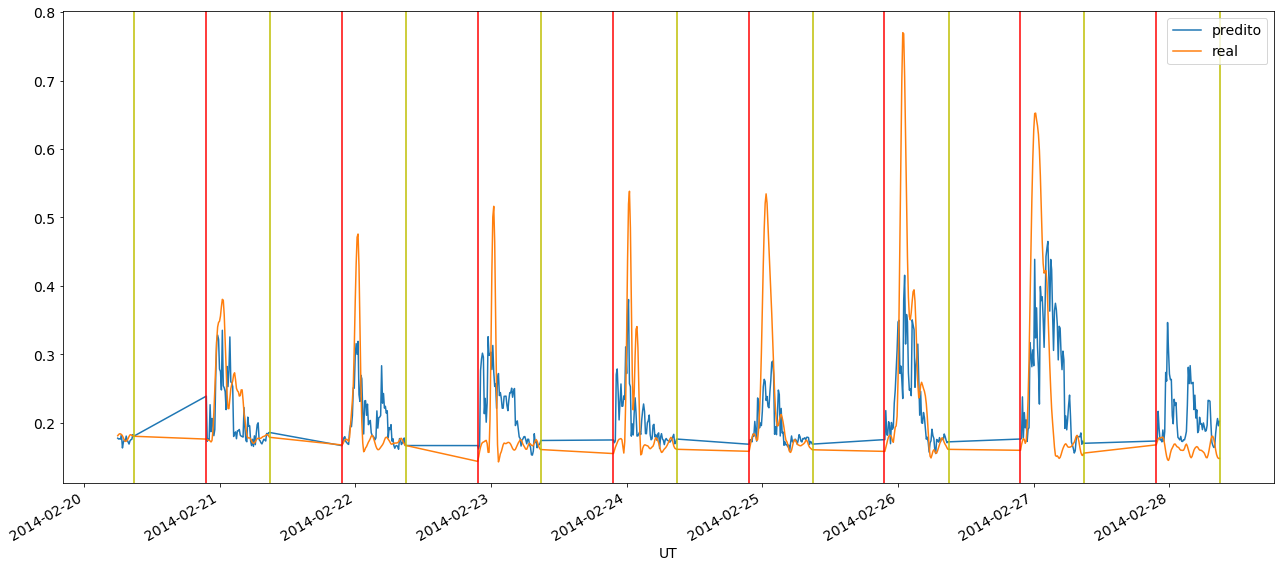

In [19]:
dict_error = generate_and_avaliate_model(df, original + ['gvtec1_dt_lag_9',], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.007740
O erro quadrático total foi: 2.085692
O maior erro por previsão foi: 0.400127
O erro relativo foi: 21.516419%
O número de verdadeiros negativos foi: 274
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 135
O POD foi: 0.862745
O FAR foi: 0.505618
A ACC foi: 0.722420
O kappa foi: 0.074638
precission: 0.494382
recal: 0.862745
f1: 0.628571


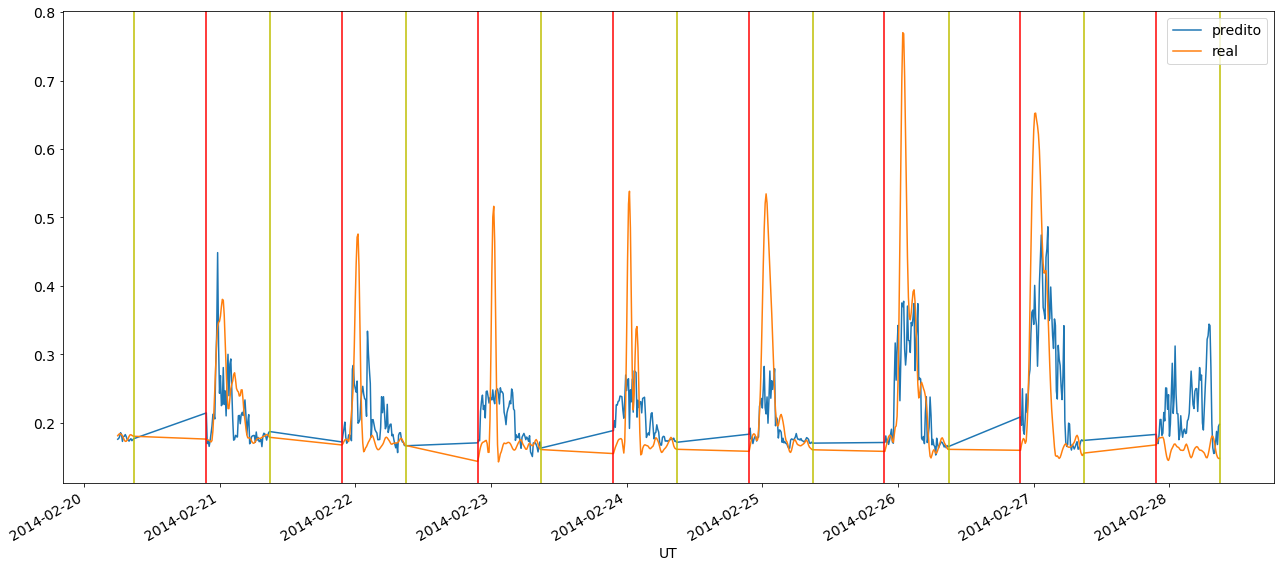

In [20]:
dict_error = generate_and_avaliate_model(df, original + ['gvtec2_dt_lag_20',], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.007969
O erro quadrático total foi: 2.116209
O maior erro por previsão foi: 0.443453
O erro relativo foi: 24.476748%
O número de verdadeiros negativos foi: 235
O número de verdadeiros positivos foi: 133
O número de falsos negativos foi: 20
O número de falsos positivos foi: 174
O POD foi: 0.869281
O FAR foi: 0.566775
A ACC foi: 0.654804
O kappa foi: 0.088151
precission: 0.433225
recal: 0.869281
f1: 0.578261


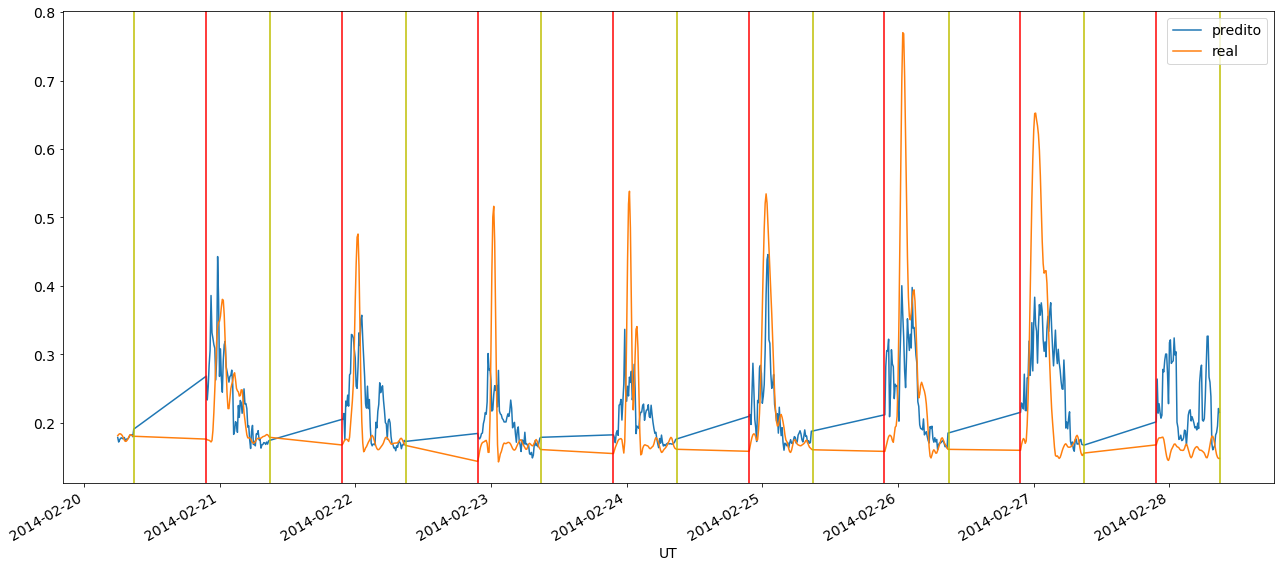

In [21]:
dict_error = generate_and_avaliate_model(df, original + mdv1, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.007968
O erro quadrático total foi: 2.116161
O maior erro por previsão foi: 0.439782
O erro relativo foi: 23.045792%
O número de verdadeiros negativos foi: 249
O número de verdadeiros positivos foi: 133
O número de falsos negativos foi: 20
O número de falsos positivos foi: 160
O POD foi: 0.869281
O FAR foi: 0.546075
A ACC foi: 0.679715
O kappa foi: 0.083142
precission: 0.453925
recal: 0.869281
f1: 0.596413


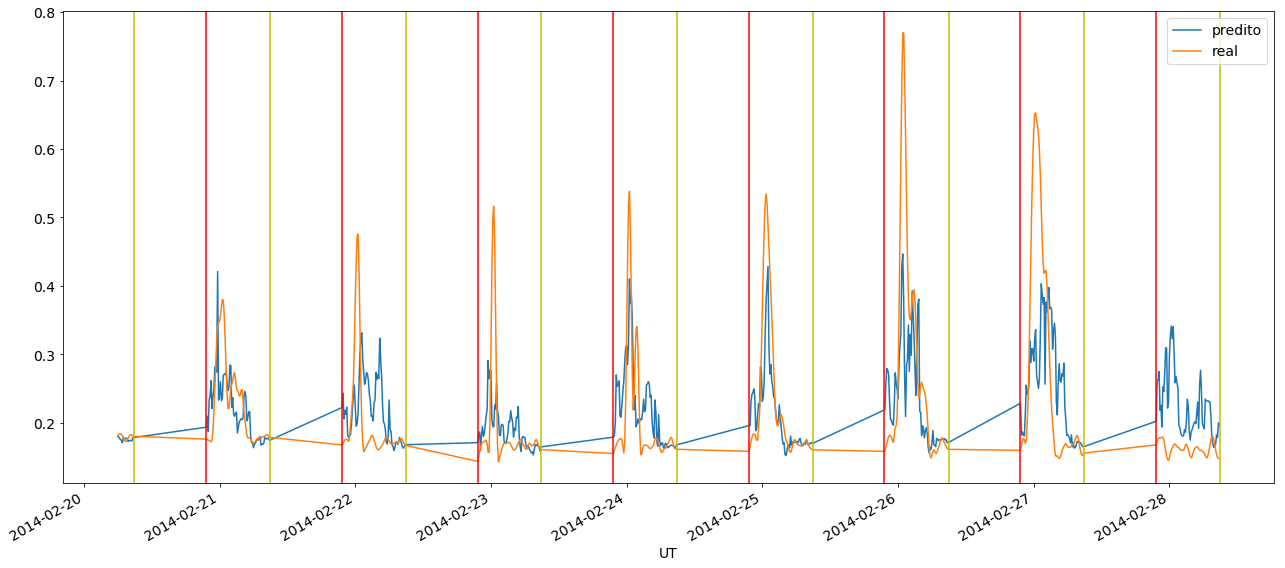

In [22]:
dict_error = generate_and_avaliate_model(df, original + mdv2, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.007256
O erro quadrático total foi: 2.019367
O maior erro por previsão foi: 0.379137
O erro relativo foi: 20.724322%
O número de verdadeiros negativos foi: 290
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 119
O POD foi: 0.830065
O FAR foi: 0.483740
A ACC foi: 0.741993
O kappa foi: 0.071722
precission: 0.516260
recal: 0.830065
f1: 0.636591


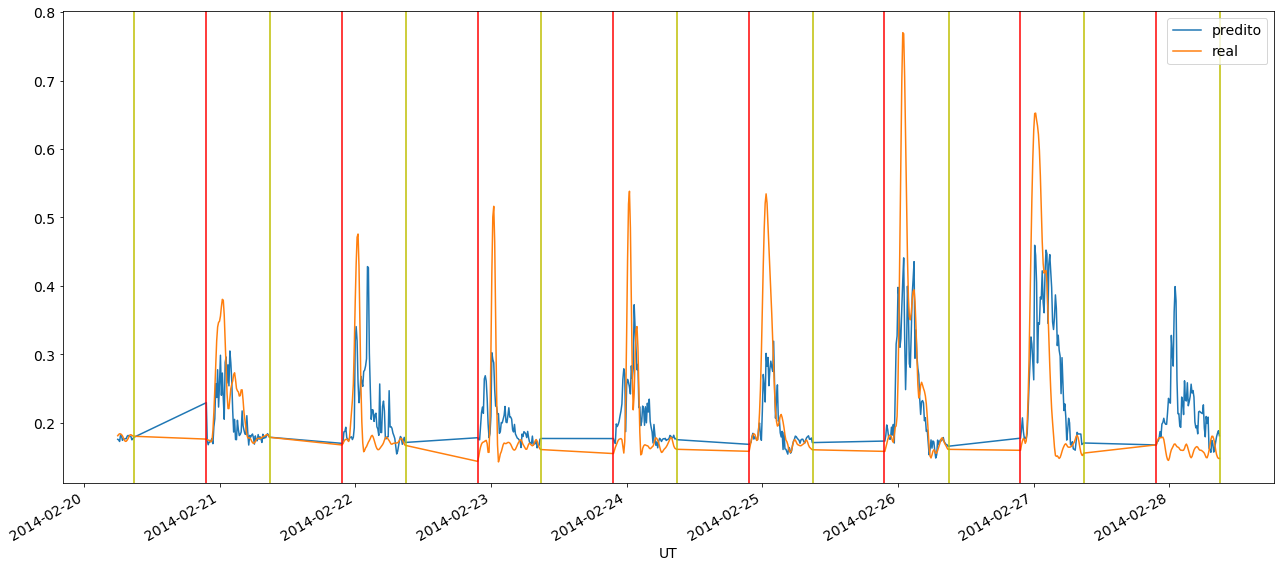

In [23]:
dict_error = generate_and_avaliate_model(df, original + tempo + lag, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.008586
O erro quadrático total foi: 2.196681
O maior erro por previsão foi: 0.501031
O erro relativo foi: 22.855464%
O número de verdadeiros negativos foi: 256
O número de verdadeiros positivos foi: 131
O número de falsos negativos foi: 22
O número de falsos positivos foi: 153
O POD foi: 0.856209
O FAR foi: 0.538732
A ACC foi: 0.688612
O kappa foi: 0.081290
precission: 0.461268
recal: 0.856209
f1: 0.599542


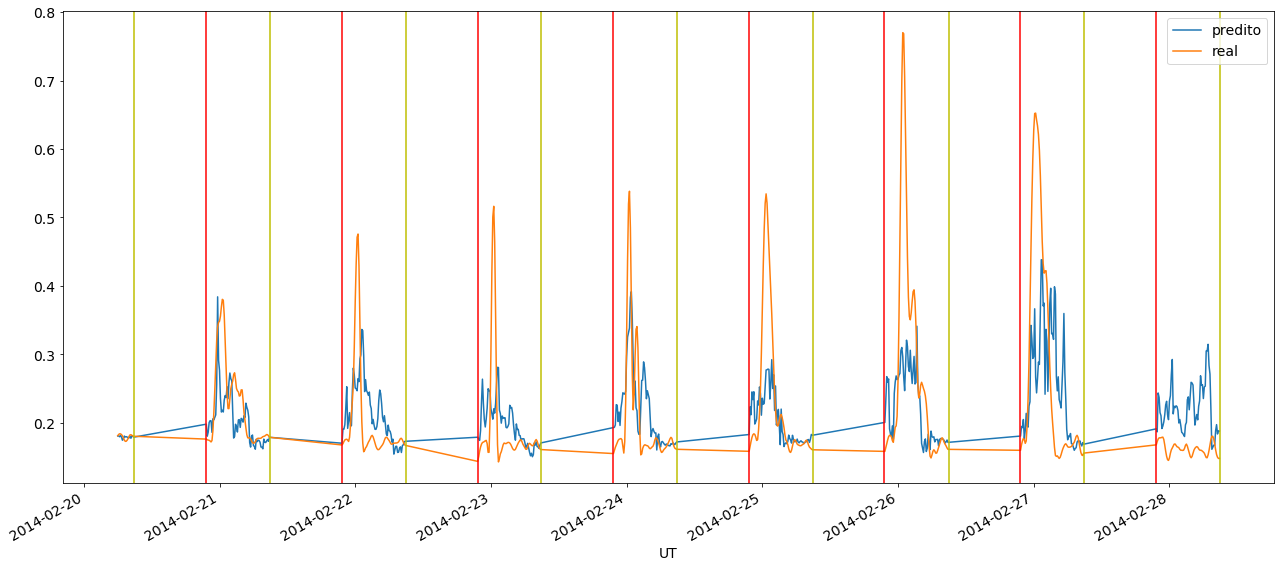

In [24]:
dict_error = generate_and_avaliate_model(df, original + tempo + mdv2, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.007024
O erro quadrático total foi: 1.986769
O maior erro por previsão foi: 0.414599
O erro relativo foi: 21.121054%
O número de verdadeiros negativos foi: 255
O número de verdadeiros positivos foi: 140
O número de falsos negativos foi: 13
O número de falsos positivos foi: 154
O POD foi: 0.915033
O FAR foi: 0.523810
A ACC foi: 0.702847
O kappa foi: 0.078757
precission: 0.476190
recal: 0.915033
f1: 0.626398


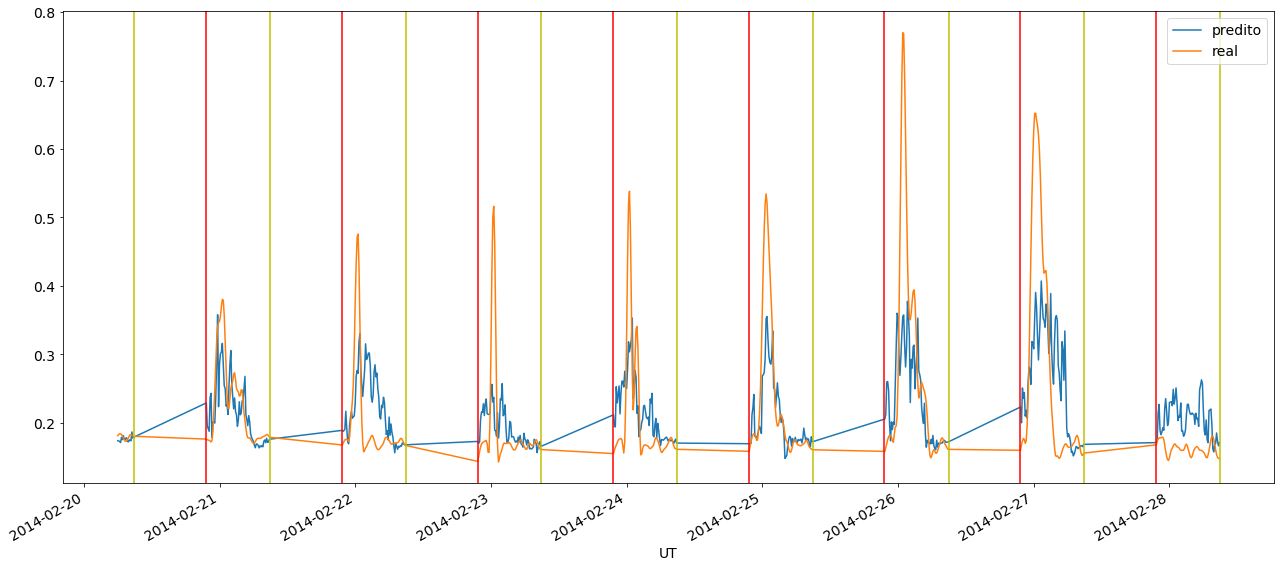

In [25]:
dict_error = generate_and_avaliate_model(df, original + tempo + mdv2 + lag, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.008073
O erro quadrático total foi: 2.130093
O maior erro por previsão foi: 0.479672
O erro relativo foi: 25.469775%
O número de verdadeiros negativos foi: 259
O número de verdadeiros positivos foi: 120
O número de falsos negativos foi: 33
O número de falsos positivos foi: 150
O POD foi: 0.784314
O FAR foi: 0.555556
A ACC foi: 0.674377
O kappa foi: 0.084051
precission: 0.444444
recal: 0.784314
f1: 0.567376


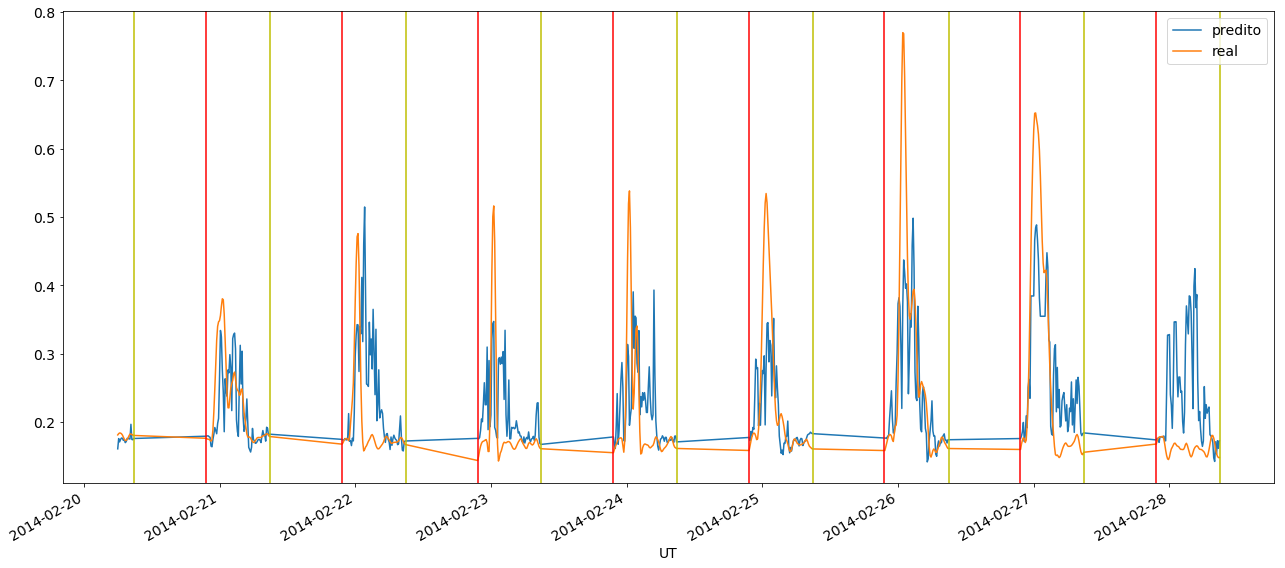

In [26]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + lag, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.010015
O erro quadrático total foi: 2.372438
O maior erro por previsão foi: 0.519572
O erro relativo foi: 28.537362%
O número de verdadeiros negativos foi: 213
O número de verdadeiros positivos foi: 126
O número de falsos negativos foi: 27
O número de falsos positivos foi: 196
O POD foi: 0.823529
O FAR foi: 0.608696
A ACC foi: 0.603203
O kappa foi: 0.096399
precission: 0.391304
recal: 0.823529
f1: 0.530526


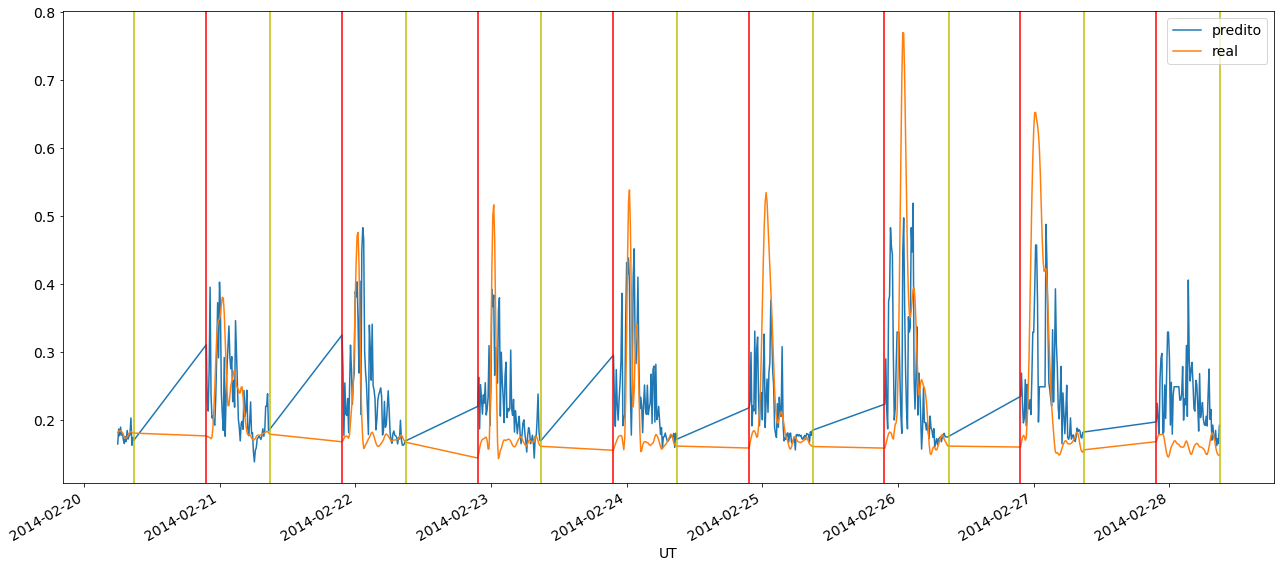

In [27]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'gvtec1_dt_lag_9'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.008383
O erro quadrático total foi: 2.170477
O maior erro por previsão foi: 0.445413
O erro relativo foi: 22.970253%
O número de verdadeiros negativos foi: 300
O número de verdadeiros positivos foi: 111
O número de falsos negativos foi: 42
O número de falsos positivos foi: 109
O POD foi: 0.725490
O FAR foi: 0.495455
A ACC foi: 0.731317
O kappa foi: 0.078200
precission: 0.504545
recal: 0.725490
f1: 0.595174


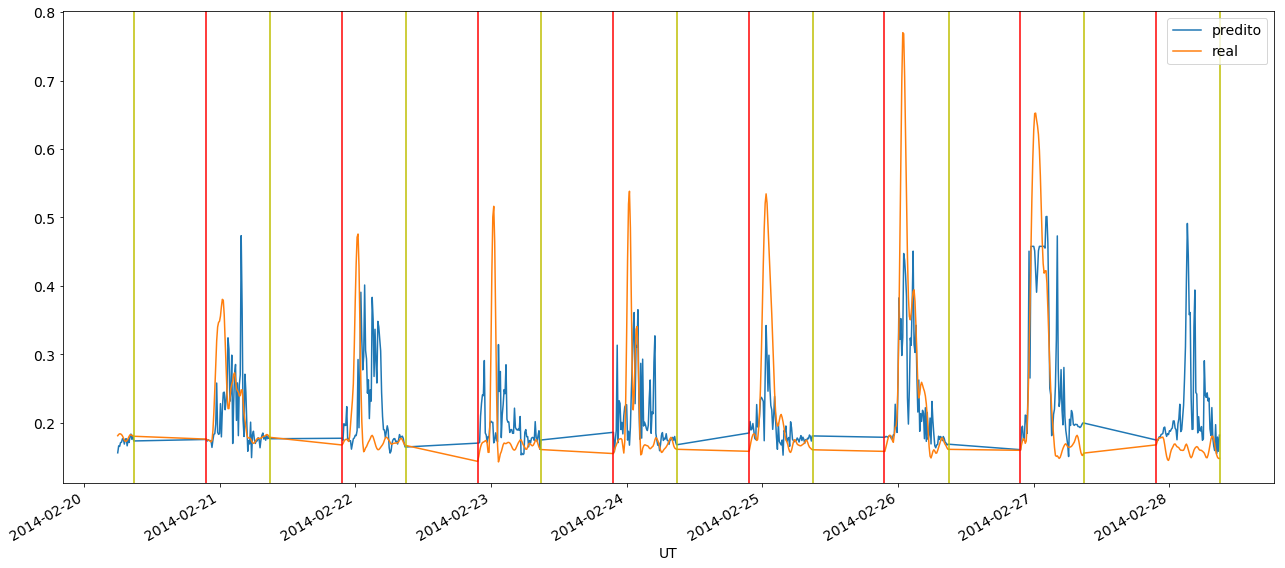

In [28]:
dict_error = generate_and_avaliate_model(df, ['vtec', 'gvtec2_dt_lag_20'], 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.012238
O erro quadrático total foi: 2.622601
O maior erro por previsão foi: 0.468021
O erro relativo foi: 28.205544%
O número de verdadeiros negativos foi: 268
O número de verdadeiros positivos foi: 121
O número de falsos negativos foi: 32
O número de falsos positivos foi: 141
O POD foi: 0.790850
O FAR foi: 0.538168
A ACC foi: 0.692171
O kappa foi: 0.081170
precission: 0.461832
recal: 0.790850
f1: 0.583133


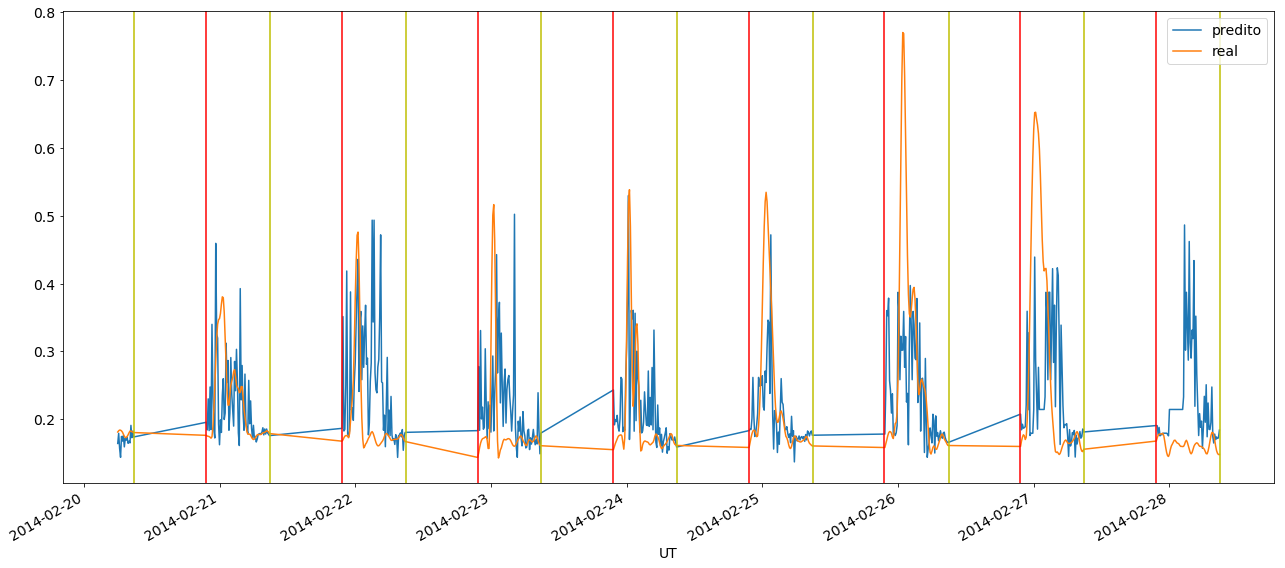

In [29]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.011853
O erro quadrático total foi: 2.580922
O maior erro por previsão foi: 0.456530
O erro relativo foi: 28.194235%
O número de verdadeiros negativos foi: 265
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 144
O POD foi: 0.797386
O FAR foi: 0.541353
A ACC foi: 0.688612
O kappa foi: 0.081632
precission: 0.458647
recal: 0.797386
f1: 0.582339


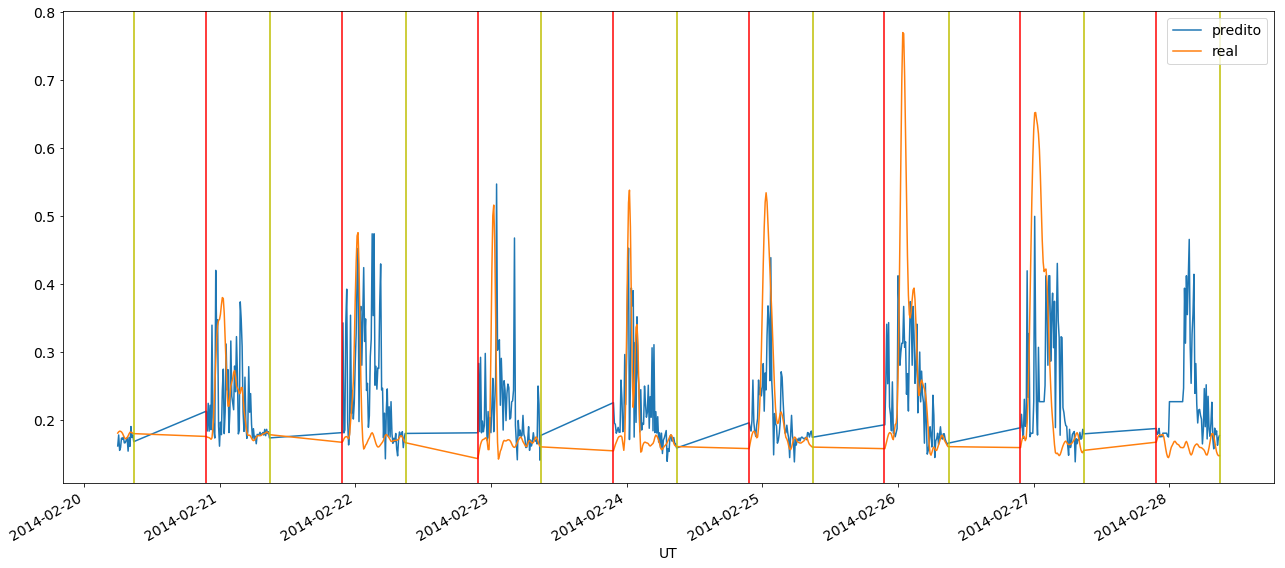

In [30]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.016551
O erro quadrático total foi: 3.049838
O maior erro por previsão foi: 0.431069
O erro relativo foi: 35.447970%
O número de verdadeiros negativos foi: 251
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 158
O POD foi: 0.803922
O FAR foi: 0.562278
A ACC foi: 0.665480
O kappa foi: 0.085371
precission: 0.437722
recal: 0.803922
f1: 0.566820


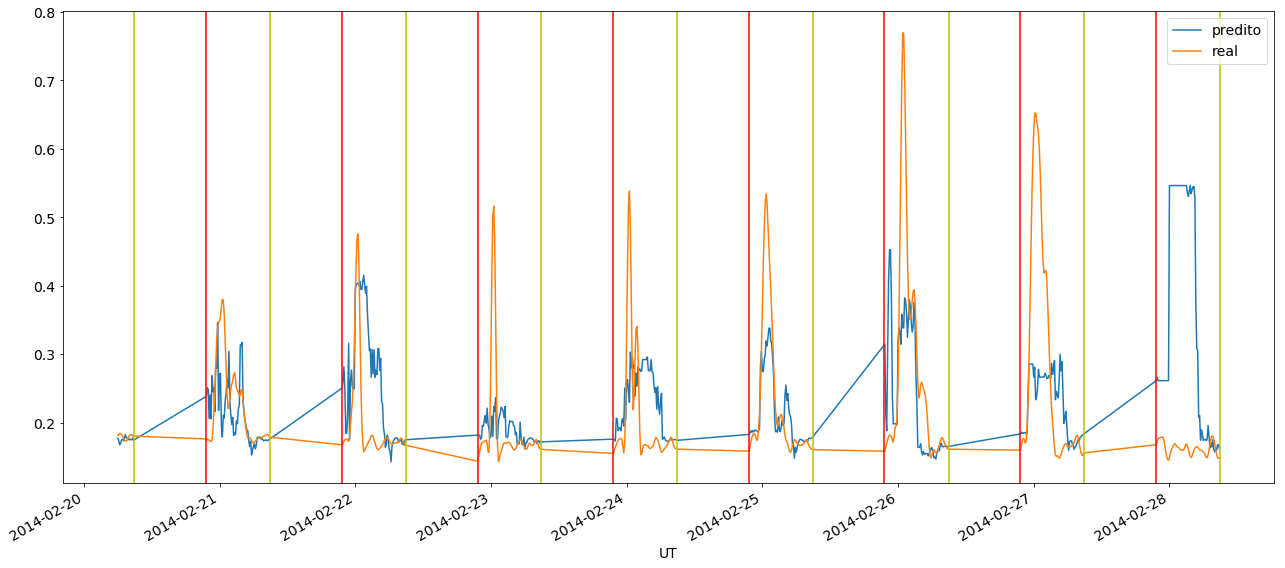

In [31]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo + mdv1, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.011936
O erro quadrático total foi: 2.589999
O maior erro por previsão foi: 0.451258
O erro relativo foi: 30.587995%
O número de verdadeiros negativos foi: 238
O número de verdadeiros positivos foi: 102
O número de falsos negativos foi: 51
O número de falsos positivos foi: 171
O POD foi: 0.666667
O FAR foi: 0.626374
A ACC foi: 0.604982
O kappa foi: 0.093654
precission: 0.373626
recal: 0.666667
f1: 0.478873


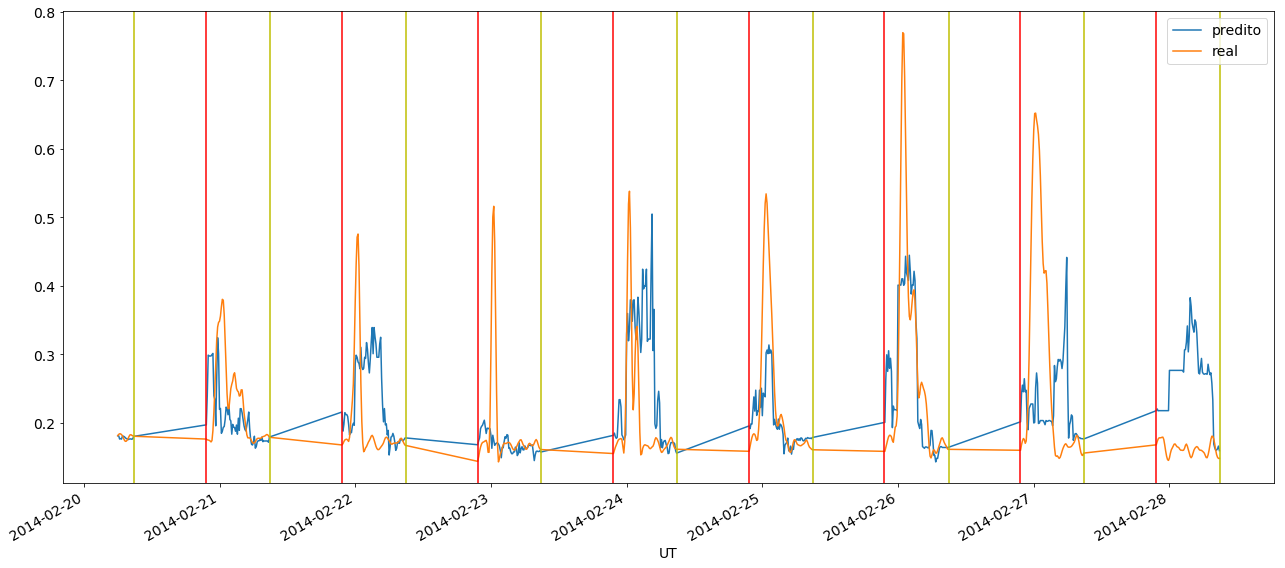

In [32]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo + mdv2, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.014110
O erro quadrático total foi: 2.815971
O maior erro por previsão foi: 0.393106
O erro relativo foi: 35.800553%
O número de verdadeiros negativos foi: 225
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 184
O POD foi: 0.803922
O FAR foi: 0.599349
A ACC foi: 0.619217
O kappa foi: 0.093027
precission: 0.400651
recal: 0.803922
f1: 0.534783


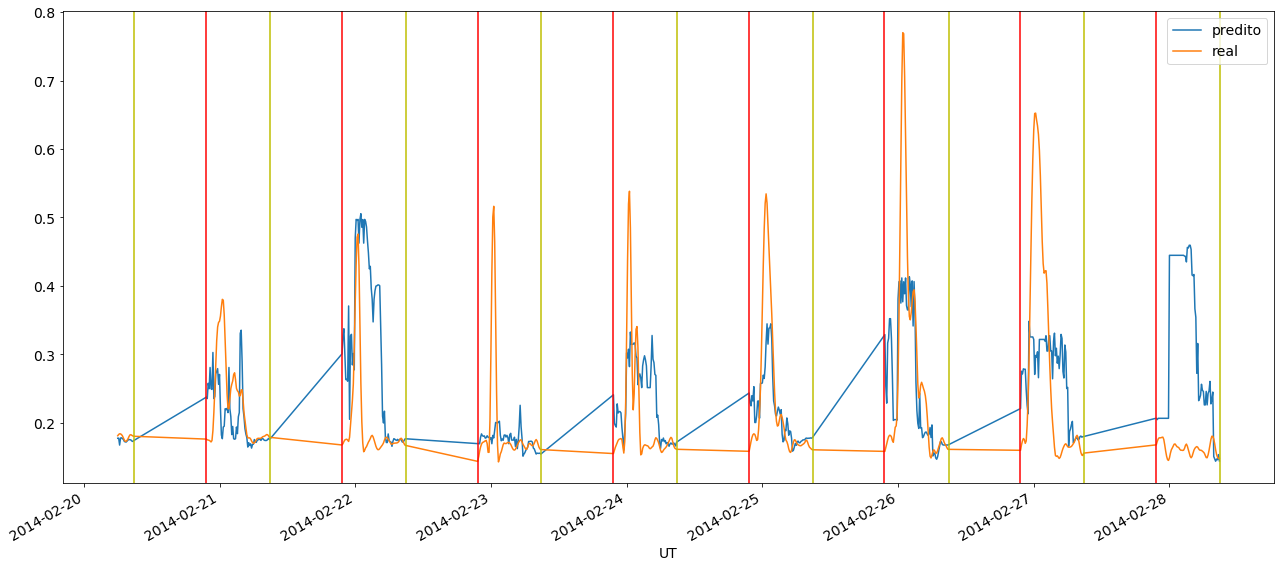

In [33]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo + mdv1 + mdv2, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.008698
O erro quadrático total foi: 2.210917
O maior erro por previsão foi: 0.446422
O erro relativo foi: 25.701407%
O número de verdadeiros negativos foi: 278
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 131
O POD foi: 0.816993
O FAR foi: 0.511719
A ACC foi: 0.717082
O kappa foi: 0.076490
precission: 0.488281
recal: 0.816993
f1: 0.611247


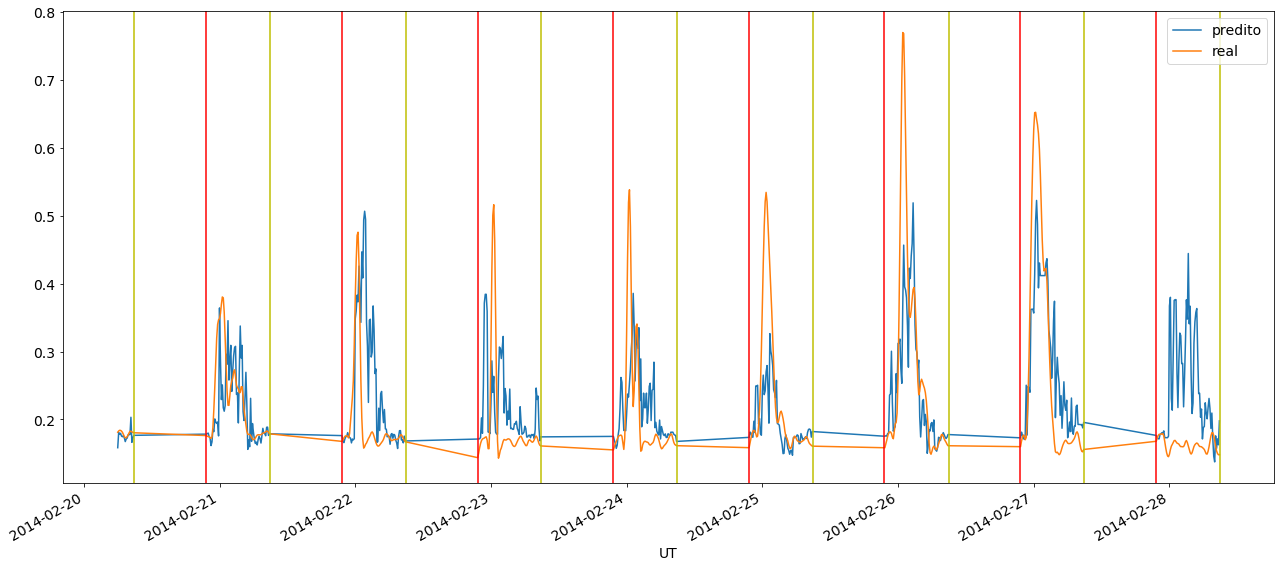

In [34]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo + lag, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.010715
O erro quadrático total foi: 2.453988
O maior erro por previsão foi: 0.415950
O erro relativo foi: 29.508876%
O número de verdadeiros negativos foi: 285
O número de verdadeiros positivos foi: 126
O número de falsos negativos foi: 27
O número de falsos positivos foi: 124
O POD foi: 0.823529
O FAR foi: 0.496000
A ACC foi: 0.731317
O kappa foi: 0.073831
precission: 0.504000
recal: 0.823529
f1: 0.625310


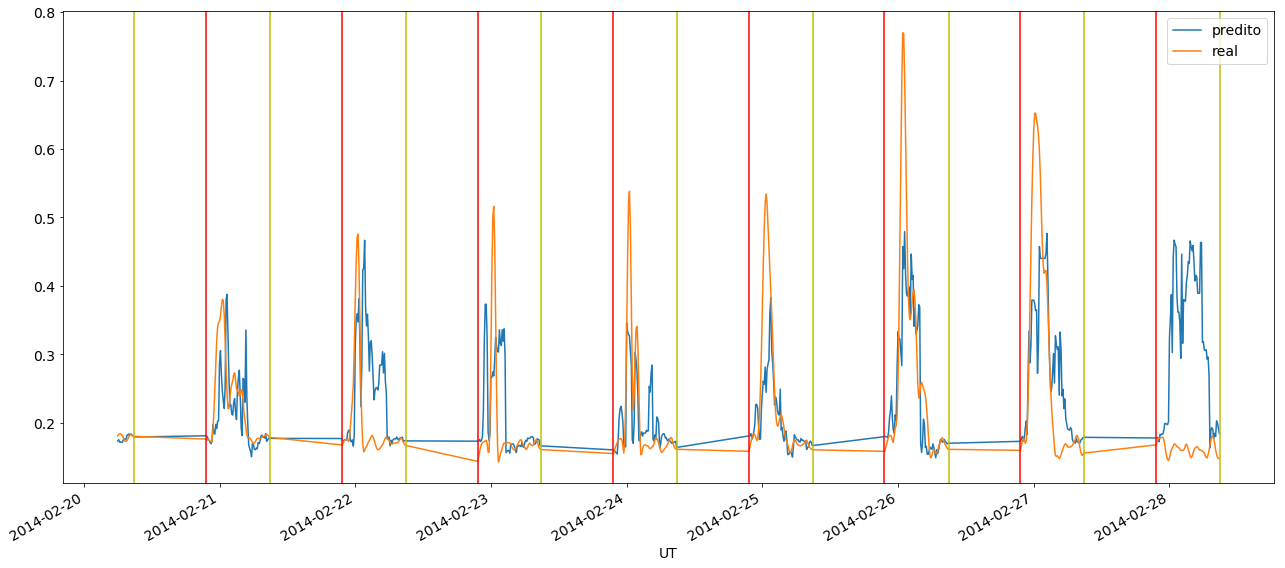

In [35]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv1, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.010013
O erro quadrático total foi: 2.372227
O maior erro por previsão foi: 0.465887
O erro relativo foi: 22.933319%
O número de verdadeiros negativos foi: 277
O número de verdadeiros positivos foi: 97
O número de falsos negativos foi: 56
O número de falsos positivos foi: 132
O POD foi: 0.633987
O FAR foi: 0.576419
A ACC foi: 0.665480
O kappa foi: 0.089652
precission: 0.423581
recal: 0.633987
f1: 0.507853


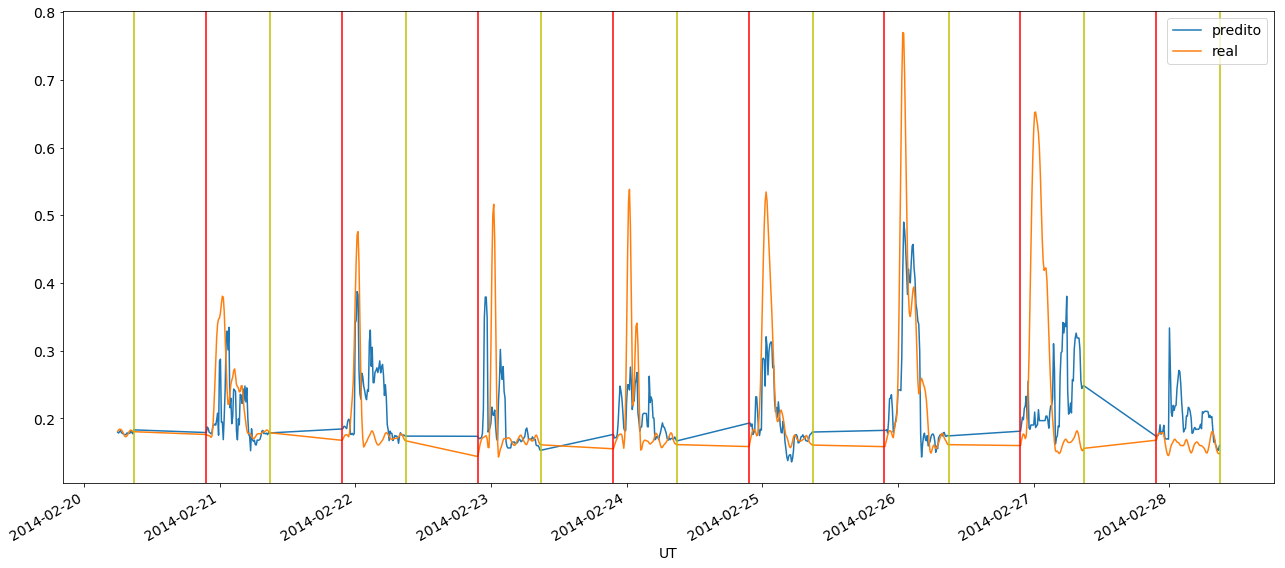

In [36]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv2, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.012869
O erro quadrático total foi: 2.689309
O maior erro por previsão foi: 0.347882
O erro relativo foi: 33.062821%
O número de verdadeiros negativos foi: 272
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 137
O POD foi: 0.816993
O FAR foi: 0.522901
A ACC foi: 0.706406
O kappa foi: 0.078333
precission: 0.477099
recal: 0.816993
f1: 0.602410


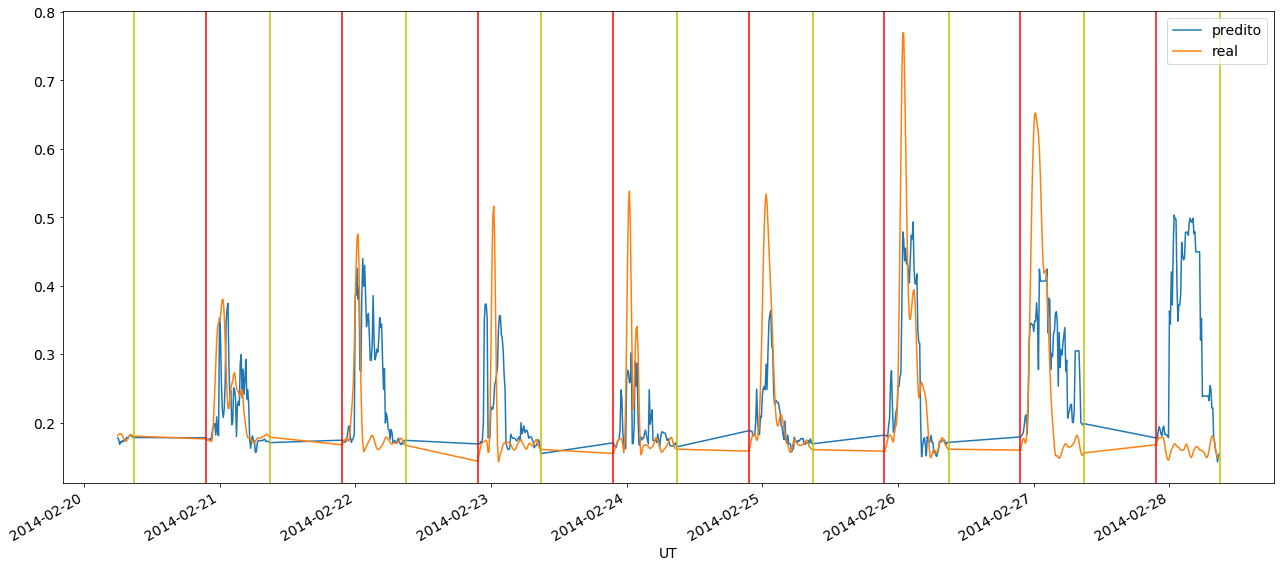

In [37]:
dict_error = generate_and_avaliate_model(df, ['vtec',] + tempo + lag + mdv1 + mdv2, 's4')
errors.append(dict_error)

Error for the time series sample:
O erro quadrático médio foi: 0.007225
O erro quadrático total foi: 2.015106
O maior erro por previsão foi: 0.387389
O erro relativo foi: 24.140166%
O número de verdadeiros negativos foi: 249
O número de verdadeiros positivos foi: 141
O número de falsos negativos foi: 12
O número de falsos positivos foi: 160
O POD foi: 0.921569
O FAR foi: 0.531561
A ACC foi: 0.693950
O kappa foi: 0.080888
precission: 0.468439
recal: 0.921569
f1: 0.621145


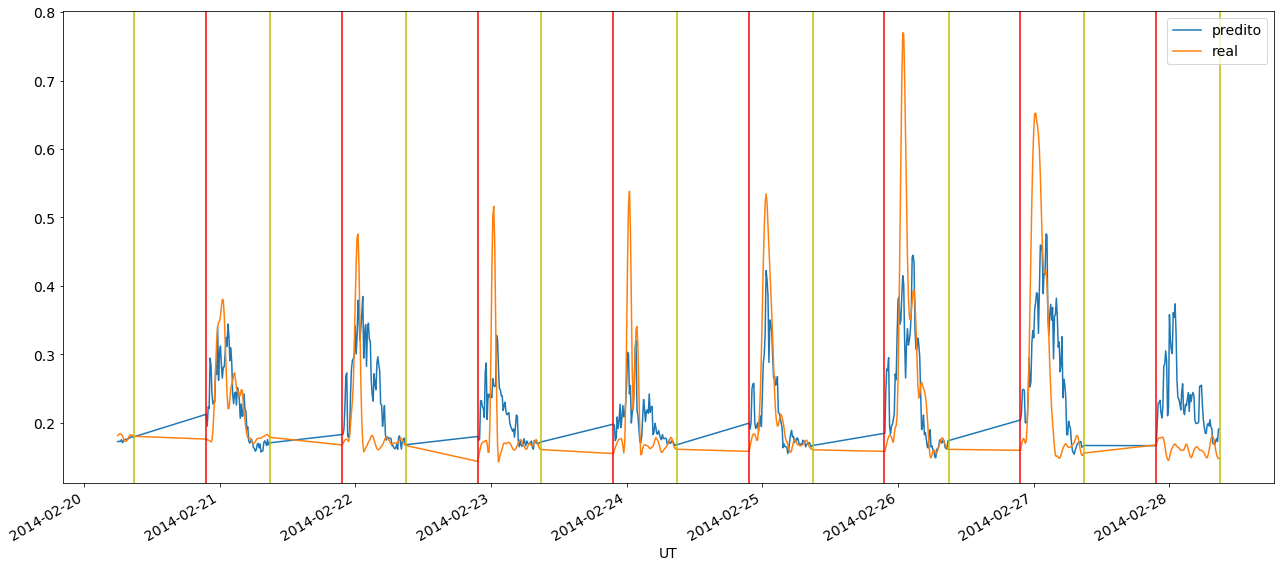

In [38]:
dict_error = generate_and_avaliate_model(df, original + tempo + lag + mdv1 + mdv2, 's4')
errors.append(dict_error)

In [39]:
errors

[{'mse': 0.008565724097883374,
  'tse': 2.1940685821118846,
  'me': 0.4450608442958902,
  're': 21.951341273425875,
  'tn': 275,
  'tp': 120,
  'fn': 33,
  'fp': 134,
  'pod': 0.7843137254901961,
  'far': 0.5275590551181102,
  'acc': 0.702846975088968,
  'kappa': 0.07964374817948101,
  'precission': 0.47244094488188976,
  'recall': 0.7843137254901961,
  'f1': 0.5896805896805897},
 {'mse': 0.0098151588044259,
  'tse': 2.3486420008352393,
  'me': 0.47756476095985023,
  're': 28.85008912323911,
  'tn': 231,
  'tp': 120,
  'fn': 33,
  'fp': 178,
  'pod': 0.7843137254901961,
  'far': 0.5973154362416108,
  'acc': 0.6245551601423488,
  'kappa': 0.0917636554754879,
  'precission': 0.40268456375838924,
  'recall': 0.7843137254901961,
  'f1': 0.532150776053215},
 {'mse': 0.008916027647407457,
  'tse': 2.238483311942037,
  'me': 0.4573540830667417,
  're': 21.879646993308558,
  'tn': 296,
  'tp': 119,
  'fn': 34,
  'fp': 113,
  'pod': 0.7777777777777778,
  'far': 0.4870689655172414,
  'acc': 0.73